In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv("iris.csv")

In [36]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [37]:
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [38]:
df.shape

(150, 5)

In [54]:
x = df.iloc[:,0:4].values
y =  df.iloc[:,4].values.reshape(-1,1)
print(x.shape)
print(y.shape)

(150, 4)
(150, 1)


In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 25)

In [56]:
print("Shape of x_train : ",x_train.shape)
print("Shape of x_test : ",x_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test : ",y_test.shape)

Shape of x_train :  (105, 4)
Shape of x_test :  (45, 4)
Shape of y_train :  (105, 1)
Shape of y_test :  (45, 1)


In [57]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

/home/unix/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [64]:
y_pred = model.predict(x_test)
accuracy = model.score(x_test, y_test)

In [61]:
print(accuracy)

0.9333333333333333


In [65]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='micro')
print(precision)

0.9333333333333333


In [66]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='micro')
print(recall)

0.9333333333333333


In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[17  0  0]
 [ 0 14  2]
 [ 0  1 11]]


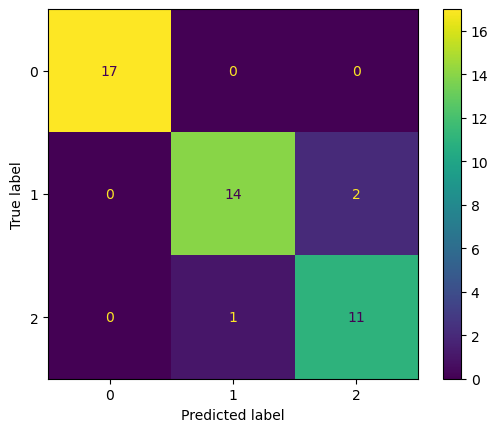

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [70]:
def get_confusion_matrix_values(y_test, Y_pred):
    cm = confusion_matrix(y_test, Y_pred)
    return (cm[0][0], cm[0][1],cm[1][0], cm[1][1])

TP, FP, FN, TN = get_confusion_matrix_values(y_test, Y_pred)
print("TP:", TP)
print("FP:", FP)
print("FN:", FN)
print("TN:", TN)

TP: 17
FP: 0
FN: 0
TN: 14


In [71]:
print("The Accuracy is: ", (TP+TN)/(TP+FP+TN+FN))
print("The Precision is: ", TP/(TP+FP))

The Accuracy is:  1.0
The Precision is:  1.0
